In [1]:
import numpy as np
import pandas as pd
import re
import time
import datetime
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
%matplotlib inline

/home/magzhan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Подход 2: логистическая регрессия

In [2]:
train = pandas.read_csv('features.csv', index_col='match_id')
test = pandas.read_csv('features_test.csv', index_col='match_id')

In [2]:
train.drop(['duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], axis=1, inplace=True)

In [2]:
y_train = train['radiant_win']
del train['radiant_win']

In [2]:
X_train = StandardScaler().fit_transform(train.fillna(0))
X_test = test.fillna(0)

## Подбор параметра регуляризации - C

In [ ]:
cv_kf = KFold(y_train.size, n_folds=5, shuffle=True, random_state=42)
scores = []
C_pow_range = range(-5, 6)
C_range = [10.0 ** i for i in C_pow_range]

C : 1e-05
[ 0.6931532   0.69481539  0.69571379  0.69513159  0.69699445]
Time spent: 0:00:02.910886
C : 0.0001
[ 0.70956686  0.71039474  0.71170336  0.71176082  0.71336295]
Time spent: 0:00:04.005773
C : 0.001
[ 0.71449541  0.71577214  0.71625974  0.71697301  0.71831738]
Time spent: 0:00:07.929198
C : 0.01
[ 0.71464598  0.71617915  0.71624749  0.71735041  0.71832832]
Time spent: 0:00:11.110598
C : 0.1
[ 0.71462192  0.71617479  0.71619187  0.71737596  0.7182712 ]
Time spent: 0:00:11.426808
C : 1.0
[ 0.71461815  0.71617185  0.71618338  0.7173762   0.71826341]
Time spent: 0:00:11.878522
C : 10.0
[ 0.71461695  0.71617179  0.71618281  0.71737669  0.7182632 ]
Time spent: 0:00:12.246565
C : 100.0
[ 0.71461692  0.71617206  0.71618249  0.71737655  0.71826345]
Time spent: 0:00:12.615890
C : 1000.0
[ 0.71461693  0.71617214  0.7161825   0.71737659  0.71826346]
Time spent: 0:00:13.435010
C : 10000.0
[ 0.71461693  0.71617215  0.71618251  0.7173766   0.71826345]
Time spent: 0:00:13.214060
C : 100000.0

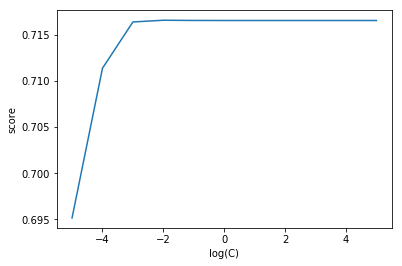

In [3]:
for C in C_range:
    start_time = datetime.datetime.now()
    print('C :', str(C))
    model = LogisticRegression(C=C, random_state=42)
    model_scores = cross_val_score(model, X_train, y_train, cv=cv_kf, scoring='roc_auc', n_jobs=-1)
    print(model_scores)
    print('Time spent:', datetime.datetime.now() - start_time)
    scores.append(np.mean(model_scores))

plot.plot(C_pow_range, scores)
plot.xlabel('log(C)')
plot.ylabel('score')
plot.show()

max_score = max(scores)
max_score_index = scores.index(max_score)


##Результаты

In [4]:
print('C: ', C_range[max_score_index], 'score: ', max_score)

C:  0.01 score:  0.716550269726


Написать выводы


## Удаление категориальных признаков

C = 1e-05
[ 0.69301063  0.69476367  0.69562225  0.69507488  0.69702952]
Time spent  0:00:03.375231
C = 0.0001
[ 0.70936502  0.71042199  0.71168956  0.71168269  0.71353648]
Time spent  0:00:05.493974
C = 0.001
[ 0.71434804  0.71581532  0.71629769  0.7168852   0.71853275]
Time spent  0:00:08.473174
C = 0.01
[ 0.71450425  0.71622052  0.71627999  0.71725088  0.71854131]
Time spent  0:00:09.846193
C = 0.1
[ 0.71448206  0.71620992  0.71622569  0.71726917  0.71848436]
Time spent  0:00:09.523592
C = 1.0
[ 0.71447768  0.71620627  0.7162209   0.71727019  0.71847678]
Time spent  0:00:10.660736
C = 10.0
[ 0.71447669  0.71620645  0.71621968  0.71727123  0.71847581]
Time spent  0:00:10.555876
C = 100.0
[ 0.7144767   0.71620624  0.71621963  0.71727119  0.71847569]
Time spent  0:00:10.876436
C = 1000.0
[ 0.71447667  0.71620624  0.71621965  0.71727119  0.71847569]
Time spent  0:00:12.174031
C = 10000.0
[ 0.71447668  0.71620627  0.71621961  0.71727117  0.71847569]
Time spent  0:00:12.712881
C = 100000.0

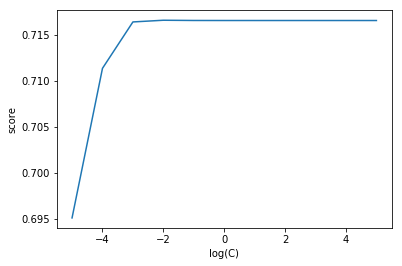

In [5]:
# Выборка для обучения
X_train = train.fillna(0)
del X_train['lobby_type']
for n in range(1, 6):
    del X_train['r{}_hero'.format(n)]
    del X_train['d{}_hero'.format(n)]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Выборка для теста
X_test = X_test.fillna(0)
del X_test['lobby_type']
for n in range(1, 6):
    del X_test['r{}_hero'.format(n)]
    del X_test['d{}_hero'.format(n)]
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

cv_kf = KFold(y_train.size, n_folds=5, shuffle=True, random_state=42)

scores = []
C_pow_range = range(-5, 6)
C_range = [10.0 ** i for i in C_pow_range]
for C in C_range:
    start_time = datetime.datetime.now()
    print('C =', str(C))
    model = LogisticRegression(C=C, random_state=42)
    model_scores = cross_val_score(model, X_train, y_train, cv=cv_kf, scoring='roc_auc', n_jobs=-1)

    print(model_scores)
    print('Time spent ', datetime.datetime.now() - start_time)
    scores.append(np.mean(model_scores))

plot.plot(C_pow_range, scores)
plot.xlabel('log(C)')
plot.ylabel('score')
plot.show()

max_score = max(scores)
max_score_index = scores.index(max_score)


## Результаты

In [ ]:
print('C: ', C_range[max_score_index], 'score: ', max_score)

Выводы


## Добавлении "мешка слов" по героям

Всего героев в игре: 112


/home/magzhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/magzhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


C = 1e-05
[ 0.69733286  0.69885623  0.69963632  0.69936261  0.70108801]
Time spent  0:00:03.309202
C = 0.0001
[ 0.72369908  0.72410239  0.72462351  0.7259918   0.72687528]
Time spent  0:00:04.931317
C = 0.001
[ 0.74472648  0.74668589  0.74398597  0.74886378  0.74736825]
Time spent  0:00:09.537421
C = 0.01
[ 0.74947929  0.75274162  0.74909634  0.75544118  0.75171197]
Time spent  0:00:15.456894
C = 0.1
[ 0.7494211   0.75311009  0.74936905  0.75602988  0.75156882]
Time spent  0:00:20.981263
C = 1.0
[ 0.74935292  0.75312852  0.74936763  0.75606873  0.75149828]
Time spent  0:00:21.864196
C = 10.0
[ 0.74934507  0.75312765  0.74936761  0.75607302  0.75149014]
Time spent  0:00:21.868875
C = 100.0
[ 0.74934389  0.75312794  0.7493676   0.75607324  0.75148945]
Time spent  0:00:26.223068
C = 1000.0
[ 0.74934309  0.75312825  0.74936757  0.7560734   0.75148966]
Time spent  0:00:23.516602
C = 10000.0
[ 0.74934293  0.7531283   0.74936698  0.75607333  0.75148969]
Time spent  0:00:22.079773
C = 100000.0

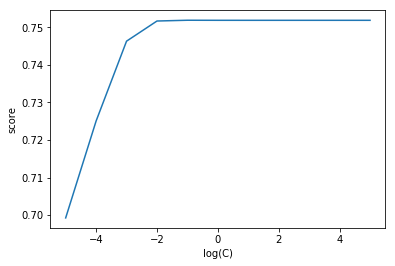

In [6]:
heroes = pandas.read_csv('./data/dictionaries/heroes.csv')
print('Всего героев в игре:', len(heroes))

X_train = train.fillna(0)
X_pick = np.zeros((X_train.shape[0], len(heroes)))
for i, match_id in enumerate(X_train.index):
    for p in range(5):
        X_pick[i, X_train.ix[match_id, 'r%d_hero' % (p + 1)] - 1] = 1
        X_pick[i, X_train.ix[match_id, 'd%d_hero' % (p + 1)] - 1] = -1

X_hero = pandas.DataFrame(X_pick, index=X_train.index)

X_test = test.fillna(0)
X_pick = np.zeros((X_test.shape[0], len(heroes)))
for i, match_id in enumerate(X_test.index):
    for p in range(5):
        X_pick[i, X_test.ix[match_id, 'r%d_hero' % (p + 1)] - 1] = 1
        X_pick[i, X_test.ix[match_id, 'd%d_hero' % (p + 1)] - 1] = -1

X_test_hero = pandas.DataFrame(X_pick, index=X_test.index)

scaler = StandardScaler()
X_train = pandas.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_test = pandas.DataFrame(scaler.transform(X_test), index=X_test.index)

X_train = pandas.concat([X_train, X_hero], axis=1)
X_test = pandas.concat([X_test, X_test_hero], axis=1)

cv_kf = KFold(y_train.size, n_folds=5, shuffle=True, random_state=42)

scores = []
C_pow_range = range(-5, 6)
C_range = [10.0 ** i for i in C_pow_range]
for C in C_range:
    start_time = datetime.datetime.now()
    print('C =', str(C))
    model = LogisticRegression(C=C, random_state=42)
    model_scores = cross_val_score(model, X_train, y_train, cv=cv_kf, scoring='roc_auc', n_jobs=-1)

    print(model_scores)
    print('Time spent ', datetime.datetime.now() - start_time)
    scores.append(np.mean(model_scores))

plot.plot(C_pow_range, scores)
plot.xlabel('log(C)')
plot.ylabel('score')
plot.show()

max_score = max(scores)
max_score_index = scores.index(max_score)


## Результаты

In [8]:
print('C: ', C_range[max_score_index], 'score: ', max_score)

C:  0.1 score:  0.75189979025


#### Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем можно объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
* Наилучшее значение показателя AUC-ROC при C = 0.01 и равно 0.71. Это сравнимо с градиентным бустингом по 2110 деревьями, при этом логистическая регрессия работает в ~25 быстрее.

#### Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем можно объяснить это изменение?
* Удаление категориальных признаков не изменило качество предсказания. Наилучшее значение показателя AUC-ROC не изменились. Следовательно, вес этих параметров в предыдушей модели был близок к нулю.

#### Сколько различных идентификаторов героев существует в данной игре?
* Всего героев в игре: 112

#### Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем можно это объяснить?
* Добавление "мешка слов" улучшило качество предсказания. Значение AUC-ROC улучшилось  до 0.75 при C = 0.1. Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id мы имеем осмысленную разреженную матрицу для построения предсказания.

#### Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?
* Минимальное значение показателя AUC-ROC у лучшего алгоритма равно 0.69 при C=0.00001 
* Максимальное значение показателя AUC-ROC у лучшего алгоритма алгоритма равно 0.751 при C=0.1 
